# Investigating the role of NCoR1 in experimental colitis in mice

I am using the RNA-seq data from the following paper:

Title: NCoR1 protects mice from dextran sodium sulfate-induced colitis by guarding colonic crypt cells from luminal insult

Authors: Elvira Mennillo, Xiaojing Yang, Miles Paszek, Johan Auwerx, Christopher Benner, and Shujuan Chen

https://www.sciencedirect.com/science/article/pii/S2352345X20300217

## Conditions

There were four conditions: 

* Wild-type (WT) with control (H2O) treatment 
* Wild-type (WT) with dextran sodium sulfate (DSS) treatment
* Knock-out (KO) with control (H2O) treatment 
* Knock-out (KO) with dextran sodium sulfate (DSS) treatment

The knock-out condition was intestinal epithelial cell-specific NCoR1-deficient mice.

## Replicate analysis

Each RNA-seq sample consisted of RNA pooled from 3 mice. 
There were 4 replicates of each condition. 

I started off by analysing the variation between the replicates. 

In [1]:
library(ggplot2)
library(plyr)

# Import data
data <- read.csv("2020_Mennillo_GSE136153_expressionTable.csv", sep = ",", header = TRUE)

# Calculate mean, standard deviation and standard error for each group of 4 replicates
summary <- data.frame("Name" = data$name, 
                      "Transcript" = data$Transcript.RepeatID..cmd.analyzeRepeats.pl.rna.mm9..strand....count.exons..d.WT1.ctrl.RNAseq.160602.WT2.ctrl.RNAseq.160602.WT3.ctrl.RNAseq.160602.WT4.ctrl.RNAseq.160602.WT1.dss.RNAseq.160602.WT2.dss.RNAseq.160602.WT3.dss.RNAseq.160602.WT4.dss.RNAseq.160602.KO1.ctrl.RNAseq.160602.KO2.ctrl.RNAseq.160602.KO3.ctrl.RNAseq.160602.KO4.ctrl.RNAseq.160602.KO1.dss.RNAseq.160602.KO2.dss.RNAseq.160602.KO3.dss.RNAseq.160602.KO4.dss.RNAseq.160602..raw..condenseGenes...cmd.getDiffExpression.pl.raw.txt.wt.wt.wt.wt.wt.dss.wt.dss.wt.dss.wt.dss.ko.ko.ko.ko.ko.dss.ko.dss.ko.dss.ko.dss..export.xxx..AvsA., 
                      "Type" = data$type, 
                      "WT-ctrl-mean" = rowMeans(data[, 10:13]),
                      "WT-ctrl-sd" = apply(data[, 10:13], 1, sd), # 1 specifies row (2 would specify column)
                      "WT-ctrl-se" = apply(data[, 10:13], 1, sd) / 2, # 2 is the square root of the number of items (4)
                      "WT-dss-mean" = rowMeans(data[, 14:17]),
                      "WT-dss-sd" = apply(data[, 14:17], 1, sd),
                      "WT-dss-se" = apply(data[, 14:17], 1, sd) / 2, 
                      "KO-ctrl-mean" = rowMeans(data[, 18:21]),
                      "KO-ctrl-sd" = apply(data[, 18:21], 1, sd),
                      "KO-ctrl-se" = apply(data[, 18:21], 1, sd) / 2, 
                      "KO-dss-mean" = rowMeans(data[, 22:25]),
                      "KO-dss-sd" = apply(data[, 22:25], 1, sd),
                      "KO-dss-se" = apply(data[, 22:25], 1, sd) / 2) 

print(summary[1:10,])

    Name Transcript           Type WT.ctrl.mean WT.ctrl.sd WT.ctrl.se
1   Nox1     237038 protein-coding    2167.7200  411.58182  205.79091
2  Cldn2      12738 protein-coding    4883.7700  337.78927  168.89464
3   Fut9      14348 protein-coding    1004.4900  209.68992  104.84496
4   Cdk1      12534 protein-coding    1449.8475  528.21199  264.10600
5  Top2a      21973 protein-coding    4665.6075 1866.85548  933.42774
6    Otc      18416 protein-coding     420.0025   59.84756   29.92378
7  Ccna2      12428 protein-coding    2062.3050  920.58860  460.29430
8   Rrm1      20133 protein-coding    2722.7350  499.08732  249.54366
9  A4gnt     333424 protein-coding     403.9150   74.78331   37.39166
10 Cenpf     108000 protein-coding    1174.2525  536.16536  268.08268
   WT.dss.mean  WT.dss.sd WT.dss.se KO.ctrl.mean KO.ctrl.sd KO.ctrl.se
1     215.8575  165.35245  82.67623    1552.8600  176.09407   88.04703
2    1779.3325 1156.93159 578.46580    5239.0775  195.75365   97.87683
3     249.2300  1

In [2]:
# For each condition make a new data frame containing the mean, standard deviation and standard error of the 4
# replicates for each transcript
WT_ctrl <- data.frame(as.numeric(summary$WT.ctrl.mean))
WT_ctrl$sd <- as.numeric(summary$WT.ctrl.sd)
WT_ctrl$se <- as.numeric(summary$WT.ctrl.se)
WT_ctrl$Condition <- "WT_ctrl"
colnames(WT_ctrl) <- c("Mean", "sd", "se", "Condition")

WT_dss <- data.frame(as.numeric(summary$WT.dss.mean))
WT_dss$sd <- as.numeric(summary$WT.dss.sd)
WT_dss$se <- as.numeric(summary$WT.dss.se)
WT_dss$Condition <- "WT_dss"
colnames(WT_dss) <- c("Mean", "sd", "se", "Condition")

KO_ctrl <- data.frame(as.numeric(summary$KO.ctrl.mean))
KO_ctrl$sd <- as.numeric(summary$KO.ctrl.sd)
KO_ctrl$se <- as.numeric(summary$KO.ctrl.se)
KO_ctrl$Condition <- "KO_ctrl"
colnames(KO_ctrl) <- c("Mean", "sd", "se", "Condition")

KO_dss <- data.frame(as.numeric(summary$KO.dss.mean))
KO_dss$sd <- as.numeric(summary$KO.dss.sd)
KO_dss$se <- as.numeric(summary$KO.dss.se)
KO_dss$Condition <- "KO_dss"
colnames(KO_dss) <- c("Mean", "sd", "se", "Condition")

# Combine into one long dataframe
all_data <- rbind(WT_ctrl, WT_dss, KO_ctrl, KO_dss)
# Maintain order of conditions
all_data$Condition <- factor(all_data$Condition, levels = c("WT_ctrl", "WT_dss", "KO_ctrl", "KO_dss"))

print(all_data[1:10,])

        Mean         sd        se Condition
1  2167.7200  411.58182 205.79091   WT_ctrl
2  4883.7700  337.78927 168.89464   WT_ctrl
3  1004.4900  209.68992 104.84496   WT_ctrl
4  1449.8475  528.21199 264.10600   WT_ctrl
5  4665.6075 1866.85548 933.42774   WT_ctrl
6   420.0025   59.84756  29.92378   WT_ctrl
7  2062.3050  920.58860 460.29430   WT_ctrl
8  2722.7350  499.08732 249.54366   WT_ctrl
9   403.9150   74.78331  37.39166   WT_ctrl
10 1174.2525  536.16536 268.08268   WT_ctrl


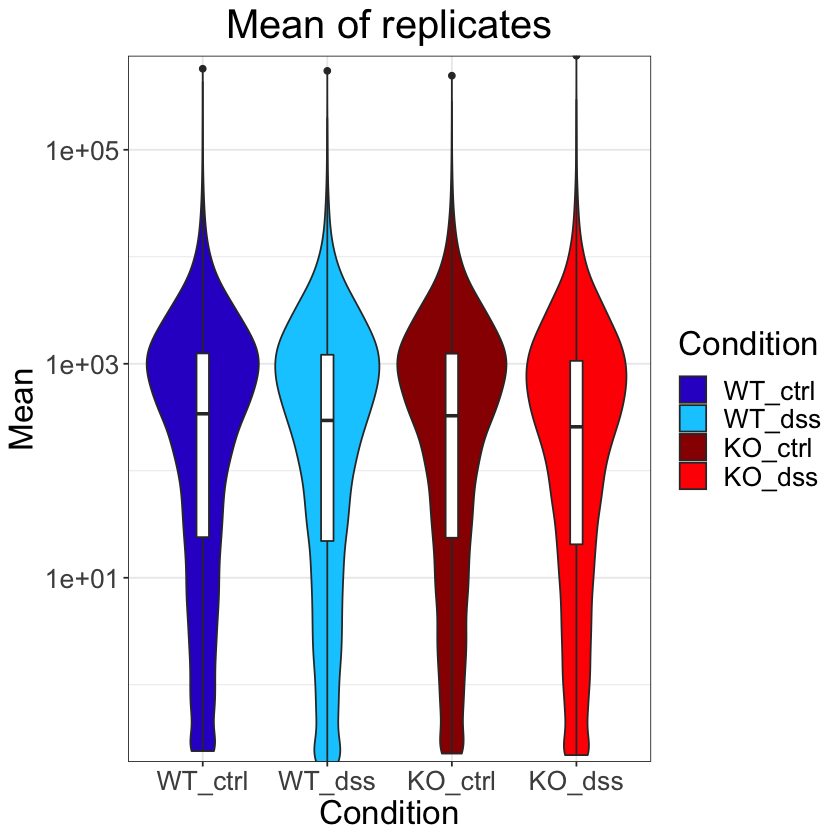

In [3]:
# Plot means

mean_data <- subset(all_data, all_data$Mean != 0)

p <- ggplot(mean_data, aes(x = Condition, y = Mean, fill = Condition)) + 
  geom_violin() +
  geom_boxplot(width = 0.1, fill = "white", na.rm = TRUE) + 
  theme_bw() + 
  scale_y_continuous(trans="log10", expand = c(0,0)) +
  scale_fill_manual(values = c("#3300CC", "#00CCFF", "#990000", "#FF0000")) + 
  theme(plot.title = element_text(hjust = 0.5)) +
  labs(x = "Condition", y = "Mean", title = "Mean of replicates") + 
  theme(text = element_text(size=20))

print(p)

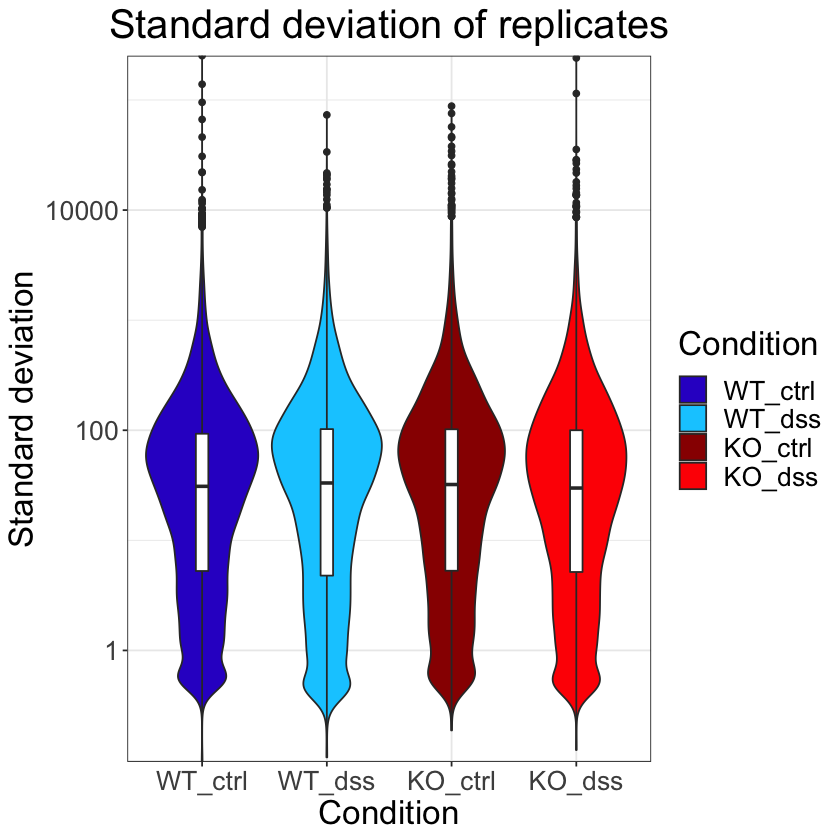

In [4]:
# Plot standard deviations

sd_data <- subset(all_data, all_data$sd != 0)

p <- ggplot(sd_data, aes(x = Condition, y = sd, fill = Condition)) + 
  geom_violin() +
  geom_boxplot(width = 0.1, fill = "white", na.rm = TRUE) + 
  theme_bw() + 
  scale_y_continuous(trans="log10", expand = c(0,0)) +
  scale_fill_manual(values = c("#3300CC", "#00CCFF", "#990000", "#FF0000")) + 
  theme(plot.title = element_text(hjust = 0.5)) +
  labs(x = "Condition", y = "Standard deviation", title = "Standard deviation of replicates") +
  theme(text = element_text(size=20))

print(p)

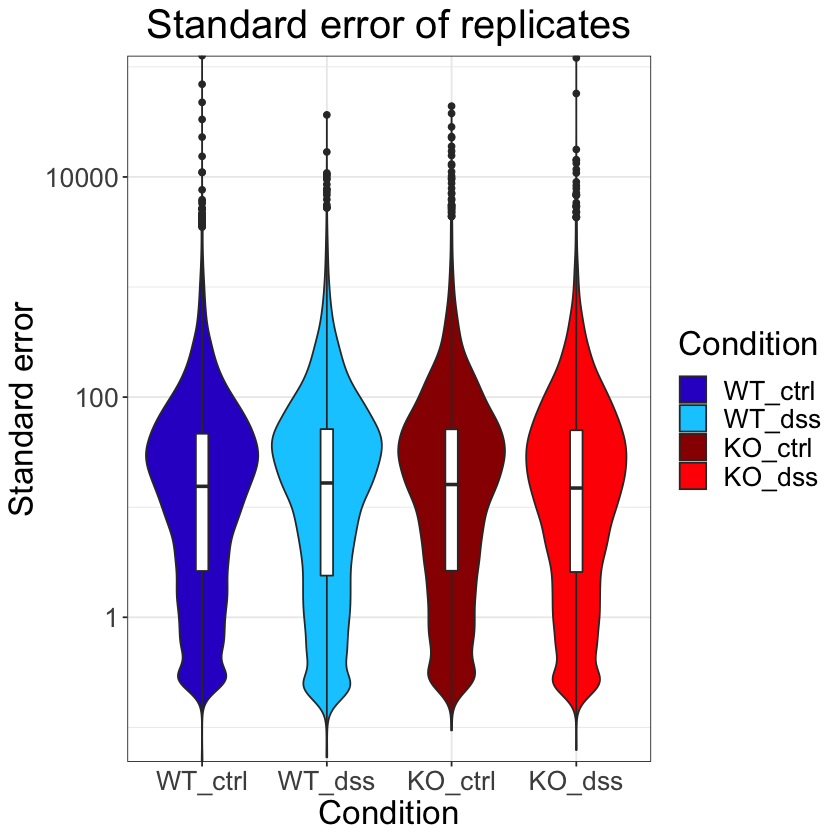

In [5]:
# Print standard errors

se_data <- subset(all_data, all_data$se != 0)

p <- ggplot(se_data, aes(x = Condition, y = se, fill = Condition)) + 
  geom_violin() +
  geom_boxplot(width = 0.1, fill = "white", na.rm = TRUE) + 
  theme_bw() +
  scale_y_continuous(trans="log10", expand = c(0,0)) +
  scale_fill_manual(values = c("#3300CC", "#00CCFF", "#990000", "#FF0000")) + 
  theme(plot.title = element_text(hjust = 0.5)) +
  labs(x = "Condition", y = "Standard error", title = "Standard error of replicates") +
  theme(text = element_text(size=20))


print(p)

## Interpretation

These graphs show that there is quite a large variation in the standard error however there is similar variation across the four conditions (see figure below)

  Condition     Mean       sd       se
1   WT_ctrl 1087.346 121.5933 60.79667
2    WT_dss 1087.346 111.4645 55.73223
3   KO_ctrl 1087.346 129.0745 64.53724
4    KO_dss 1087.346 126.1448 63.07239


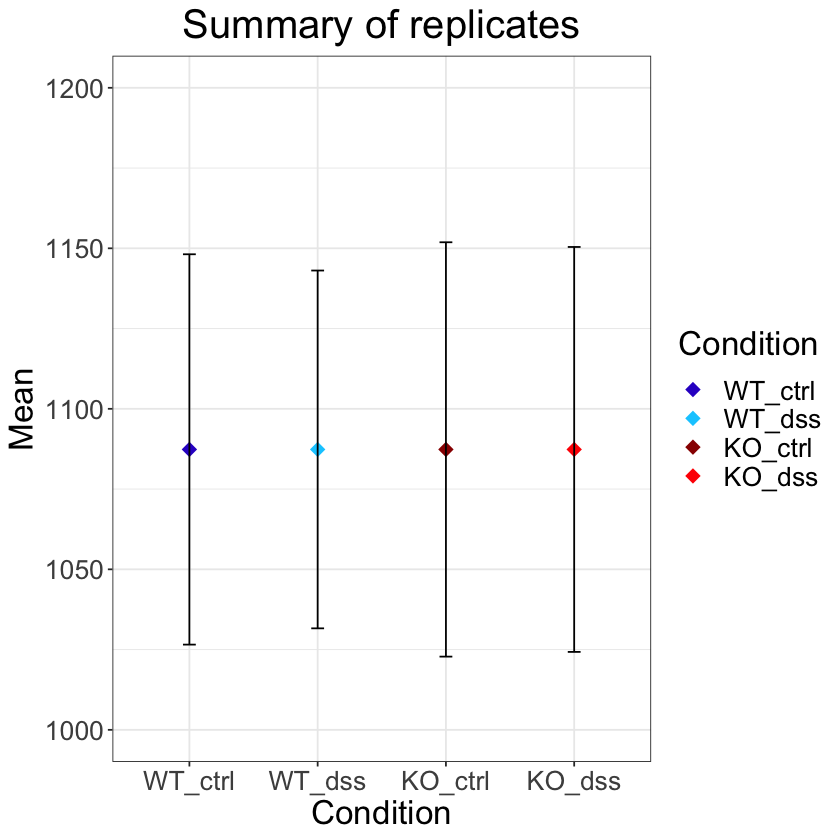

In [6]:
# Plot the mean of the means and standard errors on the same graph
summary_means <- aggregate(all_data[,1:3], by=list(all_data$Condition), FUN = mean)
colnames(summary_means) <- c("Condition", "Mean", "sd", "se")
print(summary_means)

p <- ggplot(summary_means, aes(x = Condition, y = Mean, colour = Condition)) + 
  geom_point(size = 4, shape=18) + 
  geom_errorbar(aes(ymin = Mean - se, ymax = Mean + se), colour = "black", width = 0.1) + 
  theme_bw() +
  ylim(1000,1200) + 
  scale_colour_manual(values = c("#3300CC", "#00CCFF", "#990000", "#FF0000")) + 
  theme(plot.title = element_text(hjust = 0.5)) +
  labs(x = "Condition", y = "Mean", title = "Summary of replicates") + 
  theme(text = element_text(size=20))

print(p)

There were a large number of transcripts with zeros, therefore I checked how this was distributed in terms of replicates and conditions. 

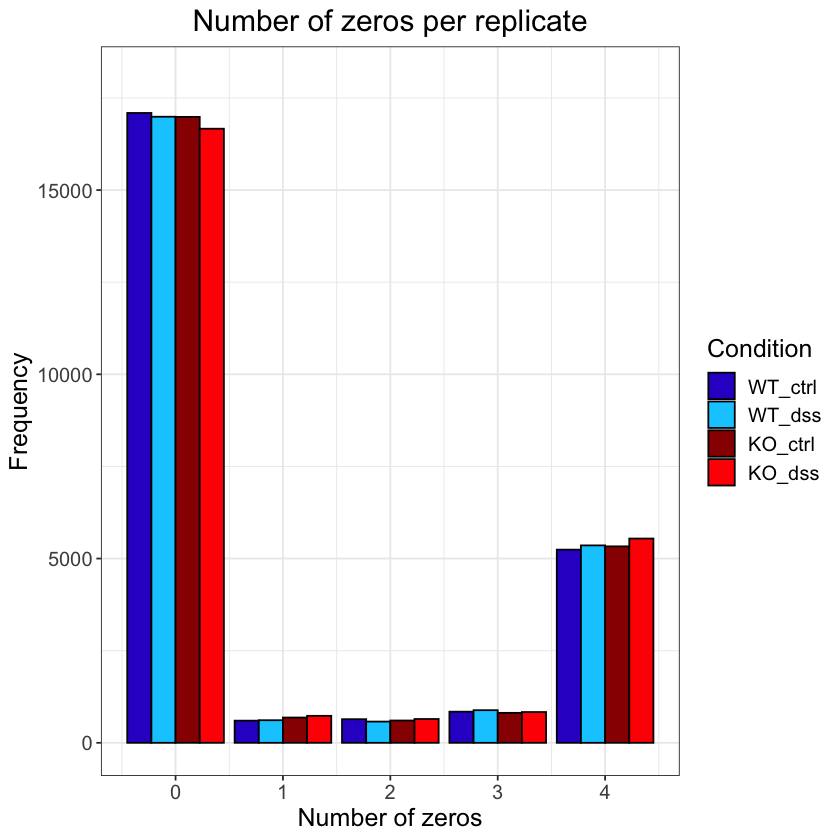

In [7]:
# For each condition make a subset containing only the relevant columns
WT_ctrl_raw <- data[c("WT1.ctrl.RNAseq.160602..30117425.0.total.",
                              "WT2.ctrl.RNAseq.160602..34733313.0.total.",
                              "WT3.ctrl.RNAseq.160602..28466659.0.total.",
                              "WT4.ctrl.RNAseq.160602..32480995.0.total.")]
# Count how many zeros in each row
WT_ctrl_raw$zero <- rowSums(WT_ctrl_raw == "0")
# Count how many times each number of zeros (0 - 4) occurs
WT_ctrl_zero <- count(WT_ctrl_raw$zero)
# Rename columns
colnames(WT_ctrl_zero) <- c("Zero", "freq")
# Add column so that this data can be linked to the condition when merge datasets
WT_ctrl_zero$Condition <- "WT_ctrl"

# Repeat for other conditions
WT_dss_raw <- data[c("WT1.dss.RNAseq.160602..32605759.0.total.",
                      "WT2.dss.RNAseq.160602..42746008.0.total.",
                      "WT3.dss.RNAseq.160602..36870488.0.total.",
                      "WT4.dss.RNAseq.160602..34599155.0.total.")]

WT_dss_raw$zero <- rowSums(WT_dss_raw == "0")
WT_dss_zero <- count(WT_dss_raw$zero)
colnames(WT_dss_zero) <- c("Zero", "freq")
WT_dss_zero$Condition <- "WT_dss"

KO_ctrl_raw <- data[c("KO1.ctrl.RNAseq.160602..29607339.0.total.",
                      "KO2.ctrl.RNAseq.160602..37908426.0.total.",
                      "KO3.ctrl.RNAseq.160602..25631586.0.total.",
                      "KO4.ctrl.RNAseq.160602..34366850.0.total.")]

KO_ctrl_raw$zero <- rowSums(KO_ctrl_raw == "0")
KO_ctrl_zero <- count(KO_ctrl_raw$zero)
colnames(KO_ctrl_zero) <- c("Zero", "freq")
KO_ctrl_zero$Condition <- "KO_ctrl"

KO_dss_raw <- data[c("KO1.dss.RNAseq.160602..31287038.0.total.",
                      "KO2.dss.RNAseq.160602..37131135.0.total.",
                      "KO3.dss.RNAseq.160602..28707706.0.total.",
                      "KO4.dss.RNAseq.160602..35049242.0.total.")]

KO_dss_raw$zero <- rowSums(KO_dss_raw == "0")
KO_dss_zero <- count(KO_dss_raw$zero)
colnames(KO_dss_zero) <- c("Zero", "freq")
KO_dss_zero$Condition <- "KO_dss"

# Combine datasets for all 4 conditions into one dataset
zero <- rbind(WT_ctrl_zero, WT_dss_zero, KO_ctrl_zero, KO_dss_zero)
zero$Condition <- factor(zero$Condition, levels = c("WT_ctrl", "WT_dss", "KO_ctrl", "KO_dss"))

# Plot the data
p <- ggplot(zero, aes(x = Zero, y = freq, fill = Condition)) + 
  geom_bar(stat = "identity", position = "dodge", color = "black") +
  ylim(0, 18000) +
  theme_bw() +
  scale_fill_manual(values = c("#3300CC", "#00CCFF", "#990000", "#FF0000")) + 
  theme(plot.title = element_text(hjust = 0.5)) +
  labs(x = "Number of zeros", y = "Frequency", title = "Number of zeros per replicate", legend = "Condition") + 
  theme(text = element_text(size=15))

print(p)

This shows that the majority of transcripts do not have any zeros in their replicates. The second most common occurrence is having all 4 replicates obtain a measurement of 0. However, there are a few instances where either 1, 2 or 3 replicates have a 0 value while the other replicates have a non-zero value. It is likely that these non-zero values are low.

The different conditions did not seem to have an effect on the number of replicates with zero values.